In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from scipy.stats import norm
warnings.filterwarnings("ignore")

fp = "M:/DataSet/usaccident/real/fillna.csv"

In [2]:
data = pd.read_csv(fp,index_col=0)
data.drop(['ID','Description'],axis=1,inplace=True)

离群点
=

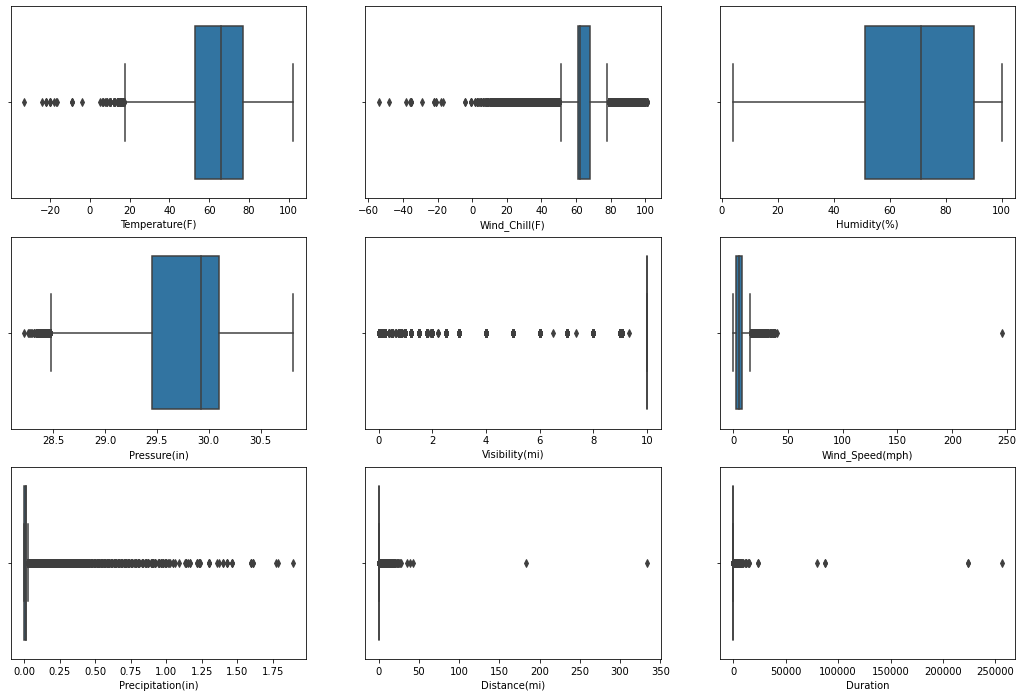

In [3]:
mask = data['Pressure(in)'] < 25
data.drop(data[mask].index,inplace=True)

cols = ['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)',
        'Wind_Speed(mph)','Precipitation(in)','Distance(mi)','Duration']
fig, ax = plt.subplots(3,3,figsize=(18,12))
r,c = 0,0
for col in cols:
    sns.boxplot(data[col],ax=ax[r,c])
    if c == 2:
        c = 0
        r += 1
    else: c += 1 
plt.show()

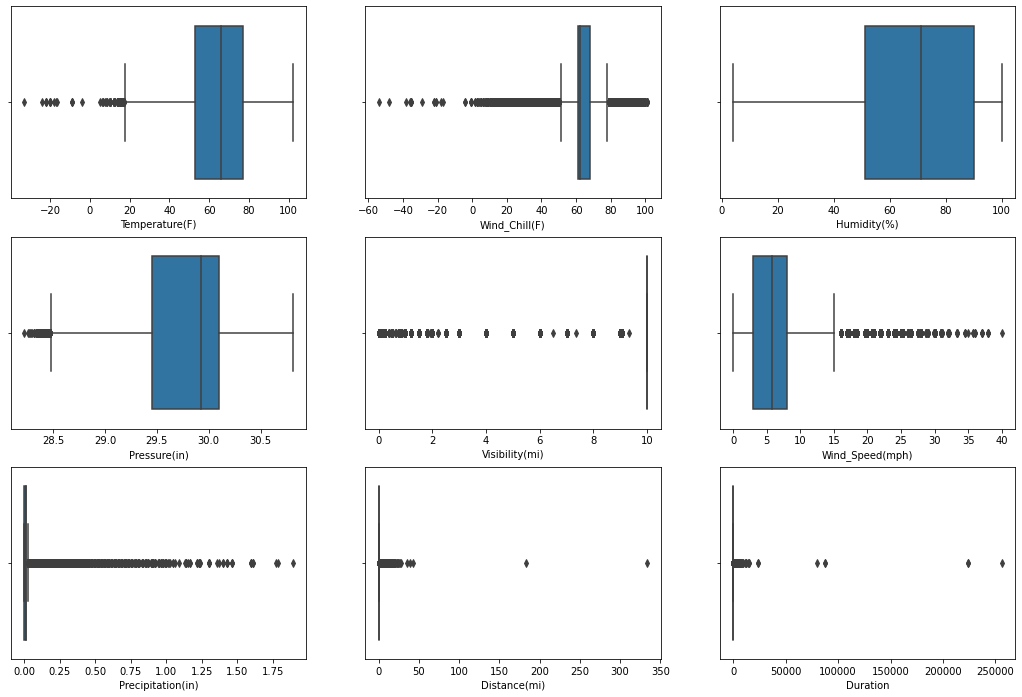

In [4]:
mask = data['Wind_Speed(mph)'] > 200
data.drop(data[mask].index,inplace=True)

cols = ['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)',
        'Wind_Speed(mph)','Precipitation(in)','Distance(mi)','Duration']
fig, ax = plt.subplots(3,3,figsize=(18,12))
r,c = 0,0
for col in cols:
    sns.boxplot(data[col],ax=ax[r,c])
    if c == 2:
        c = 0
        r += 1
    else: c += 1 
plt.show()

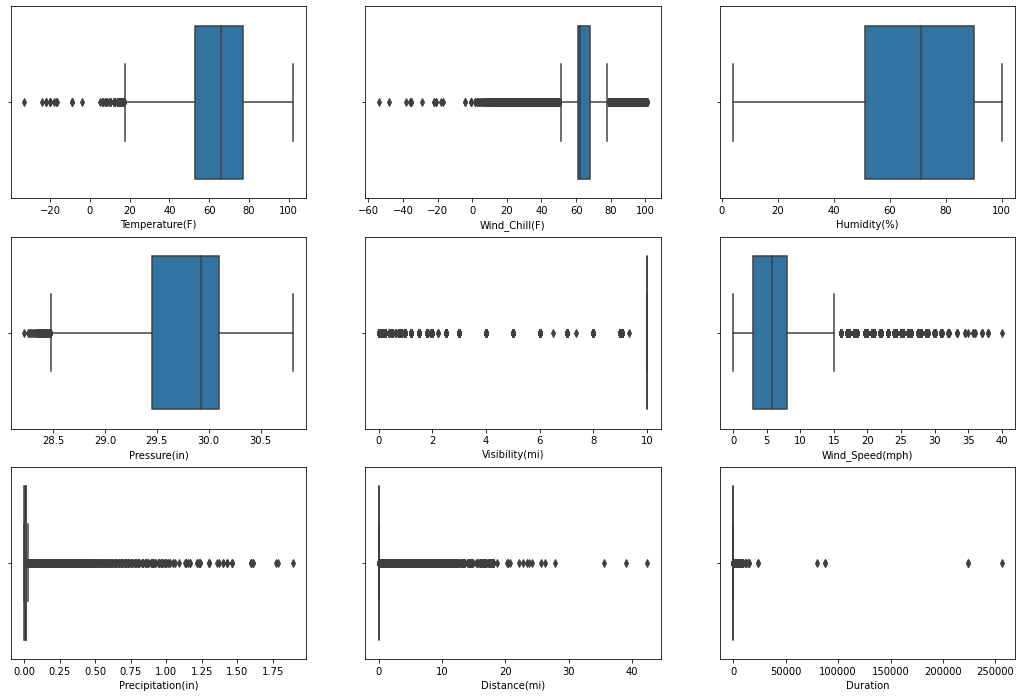

In [5]:
mask = data['Distance(mi)'] > 150
data.drop(data[mask].index,inplace=True)

cols = ['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)',
        'Wind_Speed(mph)','Precipitation(in)','Distance(mi)','Duration']
fig, ax = plt.subplots(3,3,figsize=(18,12))
r,c = 0,0
for col in cols:
    sns.boxplot(data[col],ax=ax[r,c])
    if c == 2:
        c = 0
        r += 1
    else: c += 1 
plt.show()

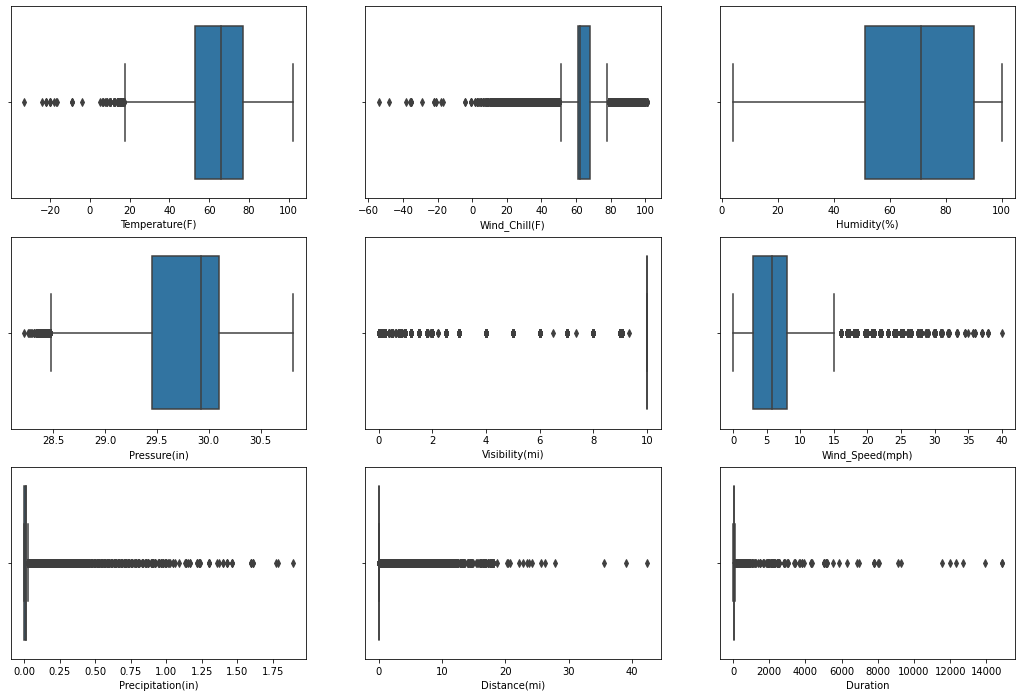

In [6]:
mask = data['Duration'] > 20000
data.drop(data[mask].index,inplace=True)

cols = ['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)',
        'Wind_Speed(mph)','Precipitation(in)','Distance(mi)','Duration']
fig, ax = plt.subplots(3,3,figsize=(18,12))
r,c = 0,0
for col in cols:
    sns.boxplot(data[col],ax=ax[r,c])
    if c == 2:
        c = 0
        r += 1
    else: c += 1 
plt.show()

特征编码
=

In [7]:
data = data.join(pd.get_dummies(data['Source']))
data.drop(['Source'],axis=1,inplace=True)
data.shape

(212697, 45)

In [8]:
data.loc[data['MapQuest-Bing']==1,'Bing'] = 1
data.loc[data['MapQuest-Bing']==1,'MapQuest'] = 1

data.drop(['MapQuest-Bing','Year'],axis=1,inplace=True)

data = data.reset_index(drop=True)

In [9]:
maps = {'L':0,'R':1}

data['Side'] = data['Side'].map(maps)
data['Side'].unique()

array([0, 1], dtype=int64)

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Sunrise_Sunset'] = le.fit_transform(data['Sunrise_Sunset'])
data['Civil_Twilight'] = le.fit_transform(data['Civil_Twilight'])
data['Nautical_Twilight'] = le.fit_transform(data['Nautical_Twilight'])
data['Astronomical_Twilight'] = le.fit_transform(data['Astronomical_Twilight'])
data[['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']].head(5)

,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,0,0,0,0
1,1,1,0,0
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1


In [11]:
boolCols = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway',
            'Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal']
for col in boolCols:
    data[col] = data[col] * 1
data['Amenity'].unique()

array([0, 1])

In [12]:
map1 = {i : 'Clear' for i in ['Clear','Fair','Fair / Windy']}

map2 = {i : 'Rain' for i in ['Heavy Rain','Rain','Light Rain','Drizzle','Light Drizzle','Light Rain / Windy',
                            'N/A Precipitation','Heavy Drizzle','Heavy Rain / Windy','Light Rain Shower',
                            'Light Freezing Rain','Light Rain Showers','Light Freezing Drizzle','Rain Showers','Rain / Windy']}

map3 = {i : 'Cloudy' for i in ['Mostly Cloudy','Scattered Clouds','Partly Cloudy','Cloudy',
                              'Mostly Cloudy / Windy','Cloudy / Windy','Partly Cloudy / Windy']}

map4 = {i : 'Dark' for i in ['Overcast','Fog','Mist','Haze','Light Freezing Fog','Shallow Fog',
                            'Smoke','Patches of Fog','Fog / Windy','Drizzle and Fog','Haze / Windy']}

map5 = {i : 'Scare' for i in ['Thunderstorm','Light Thunderstorms and Rain','Thunderstorms and Rain',
                             'Heavy Thunderstorms and Rain','Light Rain with Thunder','T-Storm',
                             'Heavy T-Storm','Thunder in the Vicinity','Thunder','T-Storm / Windy',
                             'Heavy T-Storm / Windy','Thunder / Windy']}

map6 = {i : 'Snow' for i in ['Light Snow','Snow','Wintry Mix','Light Hail','Heavy Snow','Light Snow / Windy']}

maps = {**map1,**map2,**map3,**map4,**map5,**map6}

data['Weather_Condition'] = data['Weather_Condition'].map(maps)
print(data['Weather_Condition'].unique())
print(data['Weather_Condition'].isnull().sum())

['Rain' 'Cloudy' 'Dark' 'Clear' 'Scare' 'Snow']
0


In [13]:
data = data.join(pd.get_dummies(data['Weather_Condition']))
data.drop(['Weather_Condition'],axis=1,inplace=True)
data.shape

(212697, 48)

In [14]:
map1 = {i : 'PeaceWind' for i in ['Calm','CALM']}
map2 = {i : 'VARWind' for i in ['Variable','VAR']}
map3 = {i : 'DirectionWind' for i in ['West','SSW', 'WSW', 'SW', 'North','East', 'NNE',
                                     'NW', 'WNW', 'NE', 'NNW', 'ENE', 'ESE','SSE', 'South',
                                     'SE', 'S', 'E', 'W', 'N']}
maps = {**map1,**map2,**map3}
data['Wind_Direction'] = data['Wind_Direction'].map(maps)
print(data['Wind_Direction'].unique())
print(data['Wind_Direction'].isnull().sum())

['DirectionWind' 'PeaceWind' 'VARWind']
0


In [15]:
data = data.join(pd.get_dummies(data['Wind_Direction']))
data.drop(['Wind_Direction'],axis=1,inplace=True)
data.shape

(212697, 50)

In [16]:
len(data['City'].unique())

325

In [18]:
data['Street'].unique()[:100]

array(['Ashley St', 'Bypass 25 NE', 'SC Highway 219', 'Bypass 72 NW',
       'Hazel Grove Rd', 'Old Plank Rd', 'Pigeon Dr', 'W Martintown Rd',
       'Wire Rd', 'Bettis Academy Rd', 'Highway 76 E', 'Highway 72',
       'Davis St', 'Charleston Hwy', 'Augusta Rd', 'Navajo Trail Ln',
       'Sayre St', 'Chadwick Rd', 'Winnsboro Rd', 'Jalapa Rd',
       'Springdale Dr', 'Storm Branch Rd', 'Cemetary Rd', 'SC Highway 34',
       'Maddox Bridge Rd', 'Martin Rd', 'Malibu Dr', 'Beatty Ln',
       'Highway 221 S', 'Bucklevel Rd', 'Highway 178 N', 'Greenwood Hwy',
       'Agnew Rd', 'C R Koon Hwy', 'US Highway 76', 'Windtree Rd',
       'Montague Avenue Ext', 'Old Cherokee Dr', 'Belton Hwy',
       'Belton Honea Path Hwy', 'Dobbins Bridge Rd', 'Old Shoals Rd',
       'I-20 W', 'Highway 72 W', 'Emerson St', 'Williston Rd',
       'Edgefield Hwy', 'W Shockley Ferry Rd', 'Highway 72 221 E',
       'Stoney Hill Rd', 'Lurey St', 'Abbeville Hwy', 'Lake Secession Rd',
       'Anthony Dr', 'Wagener Rd', 

In [19]:
data.drop(['Airport_Code','Zipcode'],axis=1,inplace=True)
data.shape

(212697, 48)

In [20]:
data.drop(['County','City'],axis=1,inplace=True)

In [21]:
data.drop(['Street'],axis=1,inplace=True)
data.shape

(212697, 45)

In [22]:
data.columns

Index(['TMC', 'Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Side',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Month', 'Day', 'Hour', 'Weekday', 'Duration',
       'Bing', 'MapQuest', 'Clear', 'Cloudy', 'Dark', 'Rain', 'Scare', 'Snow',
       'DirectionWind', 'PeaceWind', 'VARWind'],
      dtype='object')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212697 entries, 0 to 212696
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TMC                    212697 non-null  float64
 1   Severity               212697 non-null  int64  
 2   Start_Lat              212697 non-null  float64
 3   Start_Lng              212697 non-null  float64
 4   Distance(mi)           212697 non-null  float64
 5   Side                   212697 non-null  int64  
 6   Temperature(F)         212697 non-null  float64
 7   Wind_Chill(F)          212697 non-null  float64
 8   Humidity(%)            212697 non-null  float64
 9   Pressure(in)           212697 non-null  float64
 10  Visibility(mi)         212697 non-null  float64
 11  Wind_Speed(mph)        212697 non-null  float64
 12  Precipitation(in)      212697 non-null  float64
 13  Amenity                212697 non-null  int32  
 14  Bump                   212697 non-nu

In [24]:
def reduce_mem_usage(props):
    # 计算当前内存
    start_mem_usg = props.memory_usage().sum() / 1024 ** 2
    print("Memory usage of the dataframe is :", start_mem_usg, "MB")
    
    # 哪些列包含空值，空值用-999填充。why：因为np.nan当做float处理
    NAlist = []
    for col in props.columns:
        if (props[col].dtypes != object):
            # 判断是否是int类型
            isInt = False
            mmax = props[col].max()
            mmin = props[col].min()
            if not np.isfinite(props[col]).all():
                NAlist.append(col)
                props[col].fillna(0, inplace=True) # 用0填充

            asint = props[col].fillna(0).astype(np.int64)
            result = np.fabs(props[col] - asint)
            result = result.sum()
            if result < 0.01: # 绝对误差和小于0.01认为可以转换的，要根据task修改
                isInt = True
            
            if isInt:
                if mmin >= 0: # 最小值大于0，转换成无符号整型
                    if mmax <= 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mmax <= 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mmax <= 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else: # 转换成有符号整型
                    if mmin > np.iinfo(np.int8).min and mmax < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mmin > np.iinfo(np.int16).min and mmax < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mmin > np.iinfo(np.int32).min and mmax < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mmin > np.iinfo(np.int64).min and mmax < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)  
            else: # 注意：这里对于float都转换成float16，需要根据你的情况自己更改
                props[col] = props[col].astype(np.float16)
            
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [25]:
data, nalist = reduce_mem_usage(data)
data.info()

Memory usage of the dataframe is : 44.422884941101074 MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  11.562211036682129  MB
This is  26.027600530699676 % of the initial size
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212697 entries, 0 to 212696
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TMC                    212697 non-null  uint16 
 1   Severity               212697 non-null  uint8  
 2   Start_Lat              212697 non-null  float16
 3   Start_Lng              212697 non-null  float16
 4   Distance(mi)           212697 non-null  float16
 5   Side                   212697 non-null  uint8  
 6   Temperature(F)         212697 non-null  float16
 7   Wind_Chill(F)          212697 non-null  float16
 8   Humidity(%)            212697 non-null  float16
 9   Pressure(in)           212697 non-null  float16
 10  Visibility(mi)         212697 non-null  float16
 11  Wind_Speed

In [26]:
nalist

[]

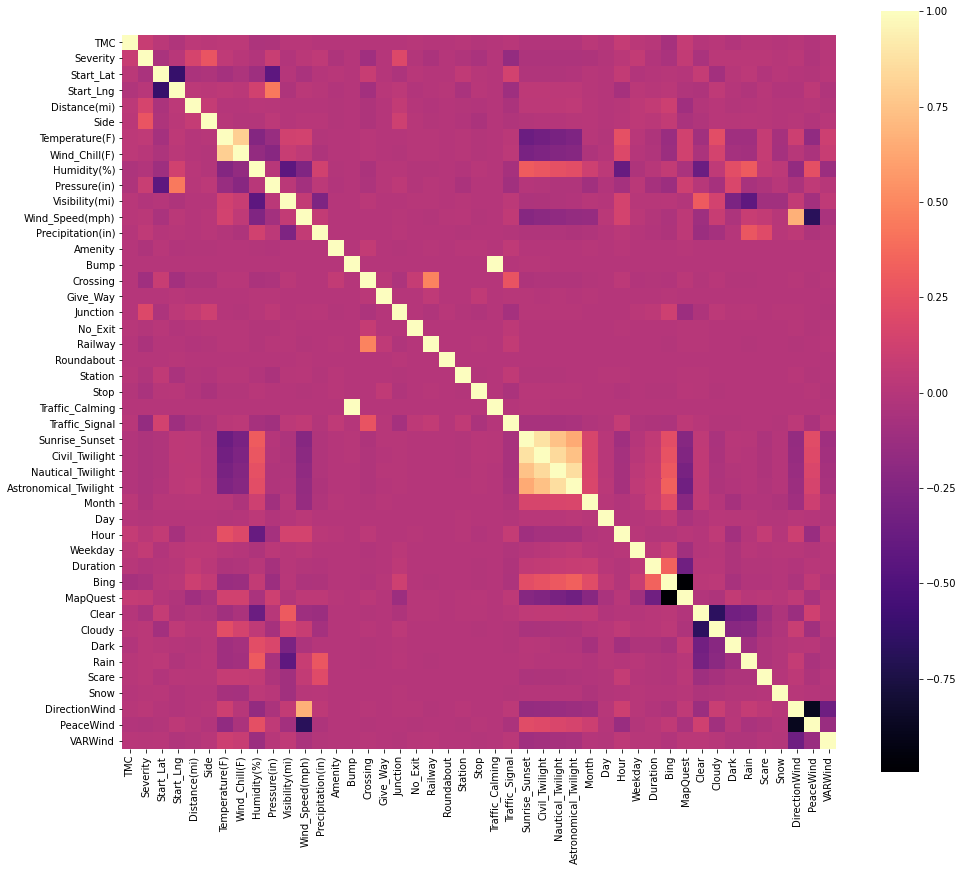

In [27]:
plt.figure(figsize=(16,14))
sns.heatmap(data.corr(),cmap='magma',square=True,annot=False)
plt.show()

In [28]:
'''去除共线特征'''
data.drop(['Traffic_Calming','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','PeaceWind'],axis=1,inplace=True)
data.shape

(212697, 40)

In [29]:
data.to_csv("M:/DataSet/usaccident/real/cleanData1.csv")